# TRABAJO DE FIN DE MÁSTER
## Máster Universitario en Análisis de Datos Masivos en Economía y   Empresa
## Estudios exploratorios sobre detección de fraude con tarjetas de crédito
### Alumno: Jorge Lazo Rosado
### Tutor: Prof. Isaac Lera Castro
### Tutor: Prof. Antoni Jaume Capó
### Palma,  Agosto 2023

### Bibliotecas Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
data1 = pd.read_csv("../../TFM/Credit Card Fraud Detection Datasets/credit card fraud v.01.csv")

In [3]:
data1.head()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [4]:
data1.tail()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
37092,1250026389,637,62.0,Female,Married,Gold,Verve,Local,534813,198167,1,Lagos
37093,1247133695,582,20.0,Male,Divorced,Gold,Verve,Local,178903,147133,0,Enugu
37094,1260545996,571,67.0,Male,Married,White,Visa,International,301594,256814,1,Abuja
37095,1267917366,528,58.0,Female,Unknown,Gold,Verve,International,212826,113439,0,Port Harcourt
37096,1252870437,659,27.0,Male,Married,White,Visa,International,133810,271388,0,Port Harcourt


In [5]:
data1.shape

(37097, 12)

### Check Variables

In [6]:
data1.columns.values

array(['AcountNumber', 'CVV', 'CustomerAge', 'Gender', 'Marital Status',
       'CardColour', 'CardType', 'Domain', 'Amount',
       'AverageIncomeExpendicture', 'Outcome', 'Customer_City_Address'],
      dtype=object)

In [7]:
data1.dtypes

AcountNumber                   int64
CVV                            int64
CustomerAge                  float64
Gender                        object
Marital Status                object
CardColour                    object
CardType                      object
Domain                        object
Amount                         int64
AverageIncomeExpendicture      int64
Outcome                        int64
Customer_City_Address         object
dtype: object

In [8]:
#data1['Gender'].astype("string")

In [9]:
data1.describe()

,AcountNumber,CVV,CustomerAge,Amount,AverageIncomeExpendicture,Outcome
count,3.709700e+04,37097.000000,28246.000000,37097.000000,37097.000000,37097.000000
mean,1.264835e+09,443.595897,39.157509,550260.997736,227386.956492,0.737796
std,1.478694e+07,135.223267,20.063996,260629.814049,78977.053916,0.439839
min,1.239297e+09,211.000000,18.000000,100003.000000,100017.000000,0.000000
25%,1.251999e+09,327.000000,23.000000,324480.000000,161178.000000,0.000000
50%,1.264885e+09,443.000000,29.000000,550293.000000,222530.000000,1.000000
75%,1.277613e+09,561.000000,55.000000,775075.000000,283447.000000,1.000000
max,1.290470e+09,678.000000,85.000000,999956.000000,399971.000000,1.000000


### Data Cleansing

In [10]:
pd.isnull(data1)

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
37092,False,False,False,False,False,False,False,False,False,False,False,False
37093,False,False,False,False,False,False,False,False,False,False,False,False
37094,False,False,False,False,False,False,False,False,False,False,False,False
37095,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
nan_count = data1.isna().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 8851


In [12]:
null_count = data1.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 8851


In [13]:
total_missing = nan_count + null_count
print('Number of missing values:', total_missing)

Number of missing values: 17702


In [14]:
pd.isna(data1["CustomerAge"])

0        False
1        False
2        False
3        False
4        False
         ...  
37092    False
37093    False
37094    False
37095    False
37096    False
Name: CustomerAge, Length: 37097, dtype: bool

In [15]:
nan_count_ca = pd.isna(data1["CustomerAge"]).sum()
print('Number of CustomerAge NaN values:', nan_count_ca)

nan_count_gnd = pd.isna(data1["Gender"]).sum()
print('Number of Gender NaN values:', nan_count_gnd)

nan_count_ms = pd.isna(data1["Marital Status"]).sum()
print('Number of Marital Status NaN values:', nan_count_ms)

nan_count_cc = pd.isna(data1["CardColour"]).sum()
print('Number of CardColour NaN values:', nan_count_cc)

nan_count_ct = pd.isna(data1["CardType"]).sum()
print('Number of CardType NaN values:', nan_count_ct)

nan_count_dm = pd.isna(data1["Domain"]).sum()
print('Number of Domain NaN values:', nan_count_dm)

nan_count_amt = pd.isna(data1["Amount"]).sum()
print('Number of Amount NaN values:', nan_count_amt)

nan_count_aie = pd.isna(data1["AverageIncomeExpendicture"]).sum()
print('Number of AverageIncomeExpendicture NaN values:', nan_count_aie)

nan_count_y = pd.isna(data1["Outcome"]).sum()
print('Number of Outcome NaN values:', nan_count_y)

nan_count_cca = pd.isna(data1["Customer_City_Address"]).sum()
print('Number of Customer_City_Address NaN values:', nan_count_cca)


Number of CustomerAge NaN values: 8851
Number of Gender NaN values: 0
Number of Marital Status NaN values: 0
Number of CardColour NaN values: 0
Number of CardType NaN values: 0
Number of Domain NaN values: 0
Number of Amount NaN values: 0
Number of AverageIncomeExpendicture NaN values: 0
Number of Outcome NaN values: 0
Number of Customer_City_Address NaN values: 0


In [16]:
data2 = data1
data2 = data2.dropna(axis=0, how='any')

In [17]:
data2 = data2.drop(['AcountNumber'], axis = 1)
data2 = data2.drop(['CVV'], axis = 1) 

In [18]:
data2.columns.values

array(['CustomerAge', 'Gender', 'Marital Status', 'CardColour',
       'CardType', 'Domain', 'Amount', 'AverageIncomeExpendicture',
       'Outcome', 'Customer_City_Address'], dtype=object)

In [19]:
nan_count_ca = pd.isna(data2["CustomerAge"]).sum()
print('Number of CustomerAge NaN values:', nan_count_ca)

Number of CustomerAge NaN values: 0


In [20]:
nan_count = data2.isna().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


In [21]:
data2.shape

(28246, 10)

In [22]:
data1['Outcome'].value_counts()

1    27370
0     9727
Name: Outcome, dtype: int64

In [23]:
data2['Outcome'].value_counts()

1    20814
0     7432
Name: Outcome, dtype: int64

In [24]:
data2["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
data2["Marital Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [26]:
data2["CardColour"].unique()

array(['Gold', 'White'], dtype=object)

In [27]:
data2["CardType"].unique()

array(['Verve', 'Visa', 'MasterCard'], dtype=object)

In [28]:
data2["Domain"].unique()

array(['Local', 'International'], dtype=object)

In [29]:
data2["Customer_City_Address"].unique()

array(['Enugu', 'Ibadan', 'Port Harcourt', 'Lagos', 'Other', 'Abuja',
       'Ota', 'Kano'], dtype=object)

In [30]:
data2.groupby("AverageIncomeExpendicture").max()

,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,Outcome,Customer_City_Address
AverageIncomeExpendicture,,,,,,,,,
100023,69.0,Male,Married,Gold,Verve,Local,836544,1,Lagos
100027,23.0,Male,Single,White,Visa,Local,735950,1,Other
100045,35.0,Female,Married,White,Visa,International,344879,1,Abuja
100046,60.0,Male,Single,White,Visa,International,524959,1,Ibadan
100052,29.0,Female,Married,White,Visa,Local,556431,1,Ibadan
...,...,...,...,...,...,...,...,...,...
399942,18.0,Male,Married,Gold,Verve,Local,287093,1,Enugu
399945,85.0,Male,Married,White,Visa,International,960899,1,Lagos
399963,18.0,Female,Divorced,White,Visa,Local,735580,1,Kano


In [31]:
data2.groupby("Amount").max()

,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,AverageIncomeExpendicture,Outcome,Customer_City_Address
Amount,,,,,,,,,
100003,22.0,Male,Single,White,Visa,International,321427,0,Ota
100074,30.0,Female,Married,Gold,Verve,Local,177325,0,Port Harcourt
100076,83.0,Male,Married,White,Visa,International,176763,0,Enugu
100104,27.0,Male,Married,White,MasterCard,Local,331274,0,Other
100140,30.0,Male,Married,Gold,Verve,International,318091,0,Lagos
...,...,...,...,...,...,...,...,...,...
999772,30.0,Male,Married,White,Visa,Local,102423,1,Port Harcourt
999842,83.0,Male,Single,White,Visa,International,152290,1,Kano
999855,45.0,Male,Single,Gold,Verve,Local,334828,1,Enugu


## Exploratory Analysis

### Gender Frequency Analysis

In [32]:
%matplotlib inline

Text(0, 0.5, 'Frecuencia de fraude')

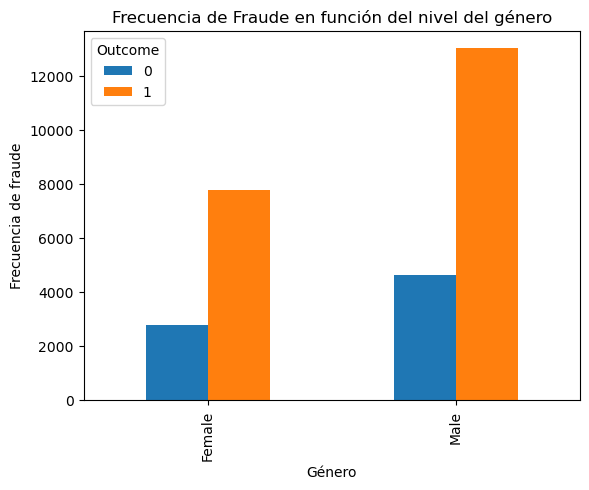

In [33]:
pd.crosstab(data2.Gender, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función del nivel del género")
plt.xlabel("Género")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

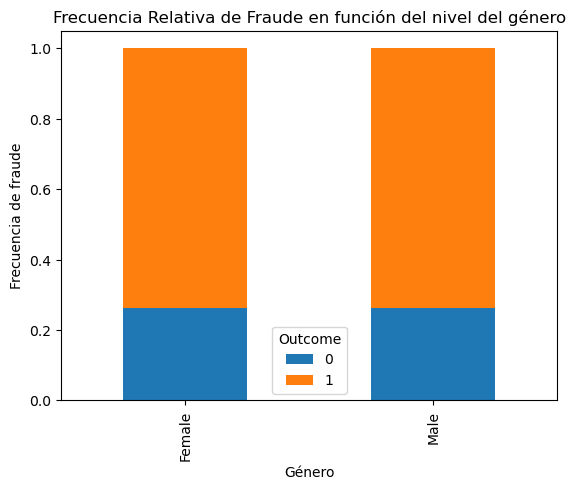

In [34]:
table=pd.crosstab(data2.Gender, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función del nivel del género")
plt.xlabel("Género")
plt.ylabel("Frecuencia de fraude")

### Marital Status Frequency Analysis

In [35]:
data2 = data2.rename(columns={'Marital Status':'MaritalStatus'})

In [36]:
data2.columns.values

array(['CustomerAge', 'Gender', 'MaritalStatus', 'CardColour', 'CardType',
       'Domain', 'Amount', 'AverageIncomeExpendicture', 'Outcome',
       'Customer_City_Address'], dtype=object)

Text(0, 0.5, 'Frecuencia de fraude')

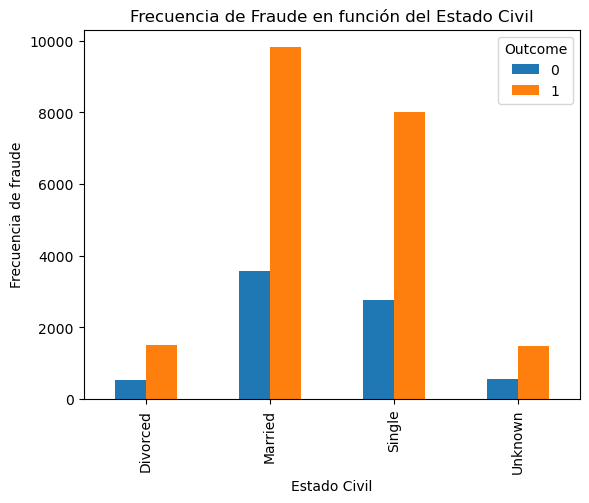

In [37]:
pd.crosstab(data2.MaritalStatus, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función del Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

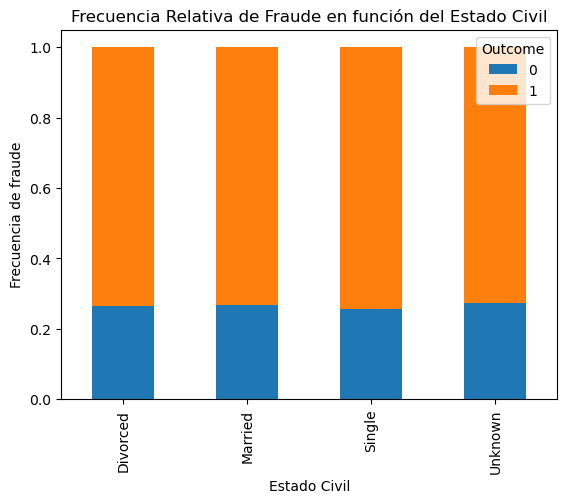

In [38]:
table=pd.crosstab(data2.MaritalStatus, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función del Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Frecuencia de fraude")

### Card Type Frequency Analysis 

Text(0, 0.5, 'Frecuencia de fraude')

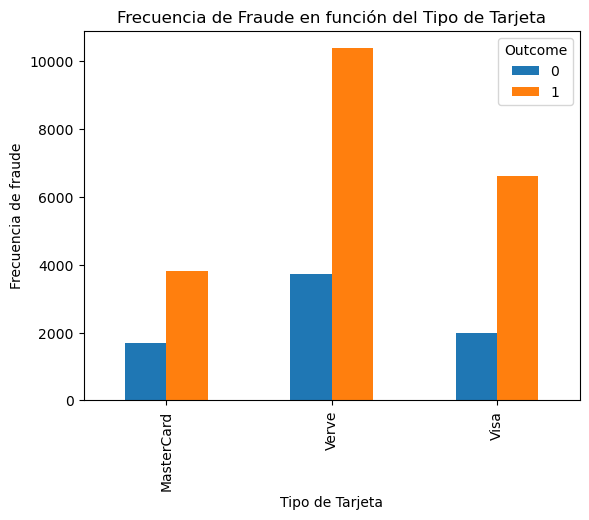

In [39]:
pd.crosstab(data2.CardType, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función del Tipo de Tarjeta")
plt.xlabel("Tipo de Tarjeta")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

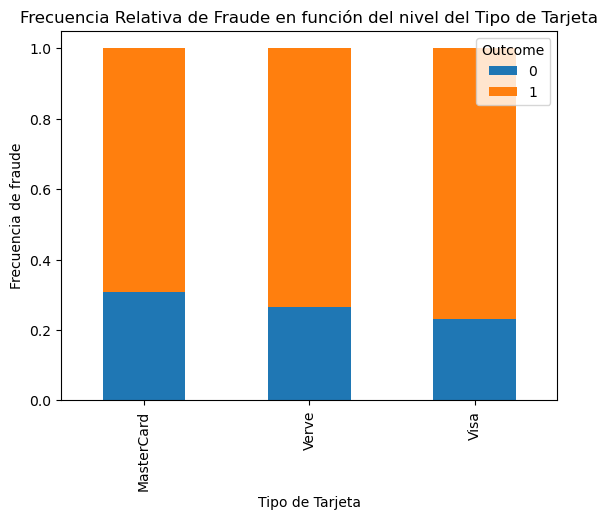

In [40]:
table=pd.crosstab(data2.CardType, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función del nivel del Tipo de Tarjeta")
plt.xlabel("Tipo de Tarjeta")
plt.ylabel("Frecuencia de fraude")

### Card Color Type Frequency Analysis 

Text(0, 0.5, 'Frecuencia de fraude')

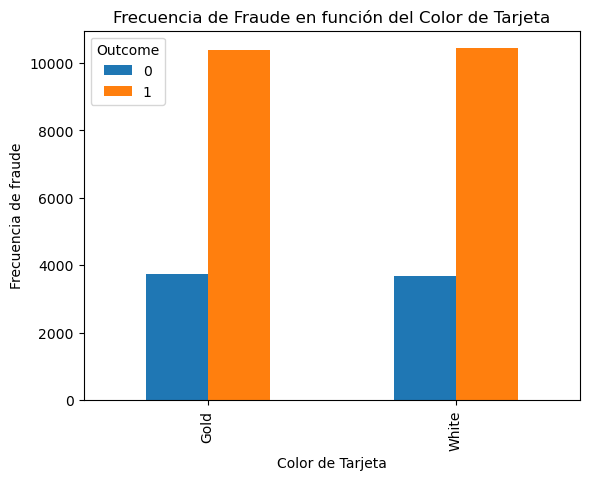

In [41]:
pd.crosstab(data2.CardColour, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función del Color de Tarjeta")
plt.xlabel("Color de Tarjeta")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

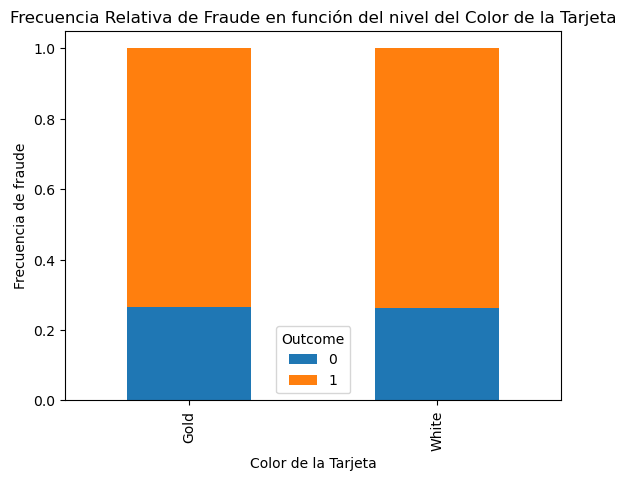

In [42]:
table=pd.crosstab(data2.CardColour, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función del nivel del Color de la Tarjeta")
plt.xlabel("Color de la Tarjeta")
plt.ylabel("Frecuencia de fraude")

### Geografic Frequency Analysis 

Text(0, 0.5, 'Frecuencia de fraude')

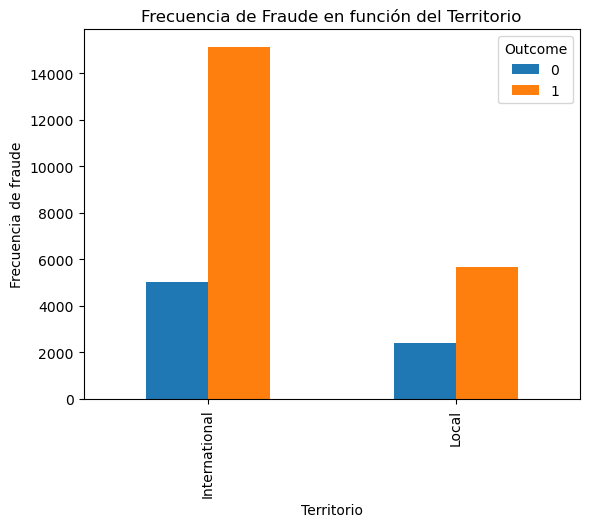

In [43]:
pd.crosstab(data2.Domain, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función del Territorio")
plt.xlabel("Territorio")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

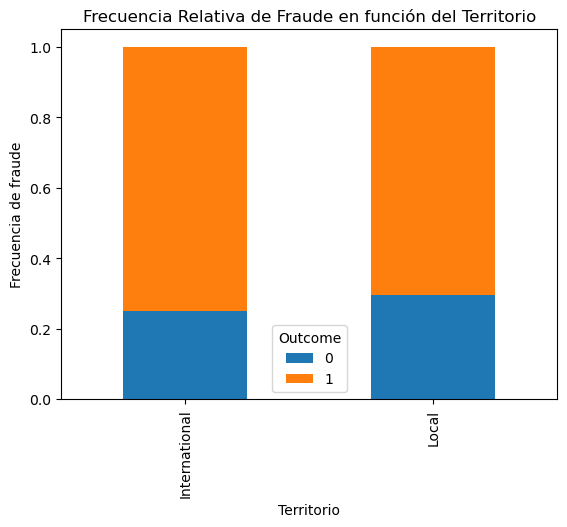

In [44]:
table=pd.crosstab(data2.Domain, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función del Territorio")
plt.xlabel("Territorio")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

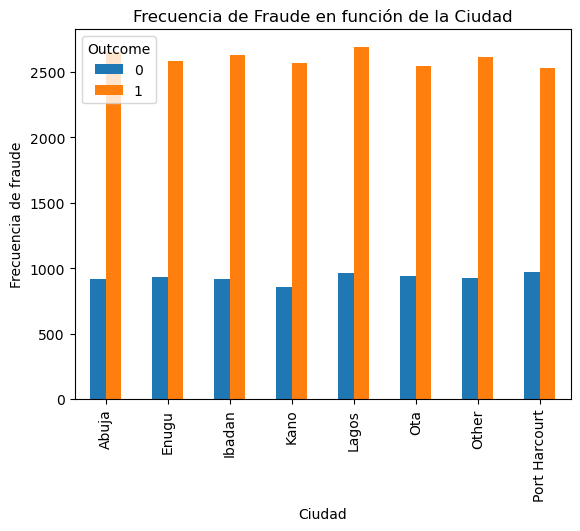

In [45]:
pd.crosstab(data2.Customer_City_Address, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función de la Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

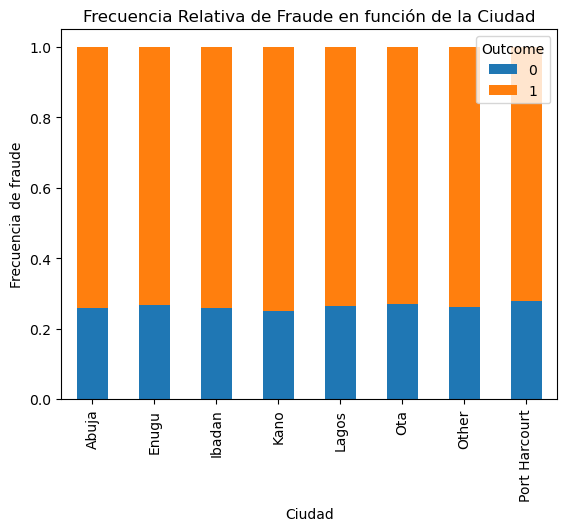

In [46]:
table=pd.crosstab(data2.Customer_City_Address, data2.Outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia Relativa de Fraude en función de la Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

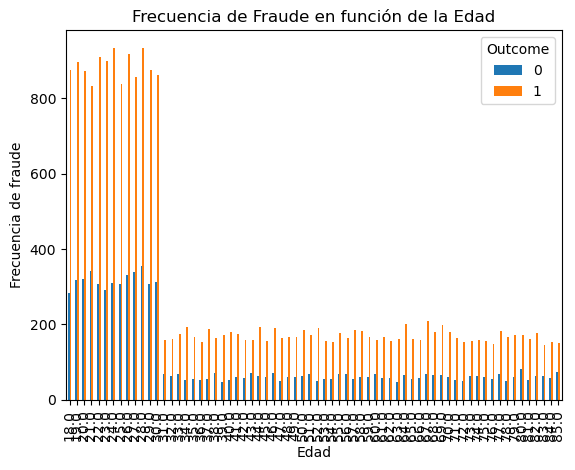

In [47]:
pd.crosstab(data2.CustomerAge, data2.Outcome).plot(kind="bar")
plt.title("Frecuencia de Fraude en función de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

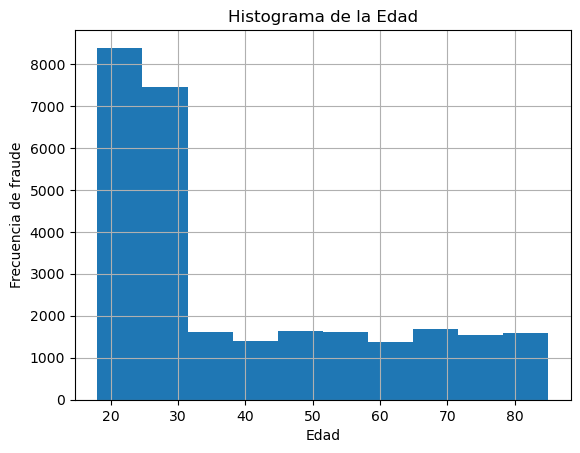

In [48]:
data2.CustomerAge.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

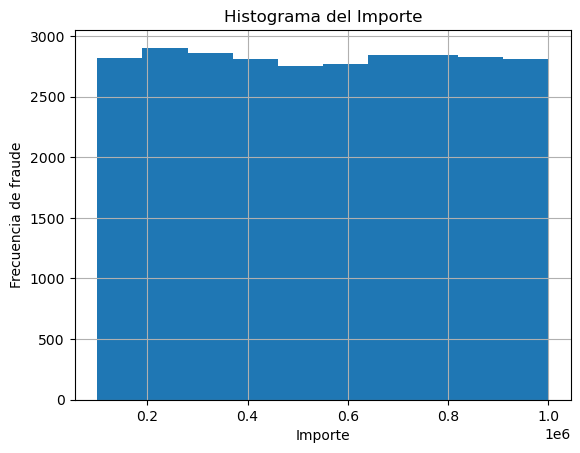

In [49]:
data2.Amount.hist()
plt.title("Histograma del Importe")
plt.xlabel("Importe")
plt.ylabel("Frecuencia de fraude")

Text(0, 0.5, 'Frecuencia de fraude')

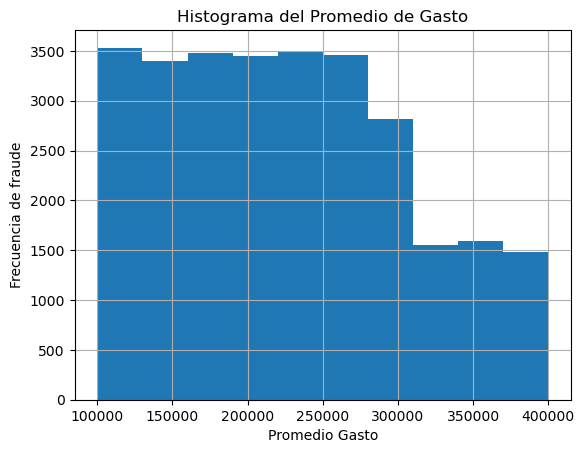

In [50]:
data2.AverageIncomeExpendicture.hist()
plt.title("Histograma del Promedio de Gasto")
plt.xlabel("Promedio Gasto")
plt.ylabel("Frecuencia de fraude")

## Tratamiento de Variables

### Conversión de las variables categóricas a ficticias

In [51]:
#table.plot(kind="bar", stacked=False)
#plt.title("Frecuencia Relativa de Fraude en función de la Ciudad")
#plt.xlabel("Ciudad")
#plt.ylabel("Frecuencia de fraude")

In [52]:
data3 = data2.rename(columns={'Gender':'Gen','MaritalStatus':'Status', 'CardColour':'Color',
                              'CardType':'Type', 'Domain':'Area', 'Customer_City_Address': 'City',
                              'CustomerAge':'Age', 'AverageIncomeExpendicture':'AIE'})

In [53]:
data3.columns.values

array(['Age', 'Gen', 'Status', 'Color', 'Type', 'Area', 'Amount', 'AIE',
       'Outcome', 'City'], dtype=object)

In [54]:
data3.head()

,Age,Gen,Status,Color,Type,Area,Amount,AIE,Outcome,City
0,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [55]:
print(data3)

        Age     Gen    Status  Color   Type           Area  Amount     AIE  \
0      28.0    Male   Married   Gold  Verve          Local  129282  170919   
1      25.0    Male    Single   Gold  Verve  International  574384  329353   
2      21.0  Female   Married  White   Visa  International  190766  292922   
3      26.0    Male   Unknown  White   Visa          Local  130395  145444   
4      28.0  Female   Married   Gold  Verve  International  685145  295990   
...     ...     ...       ...    ...    ...            ...     ...     ...   
37092  62.0  Female   Married   Gold  Verve          Local  534813  198167   
37093  20.0    Male  Divorced   Gold  Verve          Local  178903  147133   
37094  67.0    Male   Married  White   Visa  International  301594  256814   
37095  58.0  Female   Unknown   Gold  Verve  International  212826  113439   
37096  27.0    Male   Married  White   Visa  International  133810  271388   

       Outcome           City  
0            0          Enugu  

In [56]:
def createDummies(df, var_names):
    dummy = pd.get_dummies(df[var_names], prefix=var_names)
    df = df.drop(var_names, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [57]:
categories = ["Gen", "Status", "Color", "Type", "Area", "City"]

In [58]:
data4 = createDummies(data3, categories)

In [59]:
#categories = ["Gen", "Status", "Color", "Type", "Area", "City"]
#categories = ["Gen"]
#for category in categories:
#    cat_list = "Cat" + "_"+category
#    cat_dummies = pd.get_dummies(data3[category], prefix=cat_list)
#    data_new = data3.join(cat_dummies)
#    data4 = data_new

In [60]:
data4.head()

,Age,Amount,AIE,Outcome,Gen_Female,Gen_Male,Status_Divorced,Status_Married,Status_Single,Status_Unknown,...,Area_International,Area_Local,City_Abuja,City_Enugu,City_Ibadan,City_Kano,City_Lagos,City_Ota,City_Other,City_Port Harcourt
0,28.0,129282,170919,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,25.0,574384,329353,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,21.0,190766,292922,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,26.0,130395,145444,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,28.0,685145,295990,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [61]:
credit_data = data4.columns.values
credit_data

array(['Age', 'Amount', 'AIE', 'Outcome', 'Gen_Female', 'Gen_Male',
       'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Unknown', 'Color_Gold', 'Color_White', 'Type_MasterCard',
       'Type_Verve', 'Type_Visa', 'Area_International', 'Area_Local',
       'City_Abuja', 'City_Enugu', 'City_Ibadan', 'City_Kano',
       'City_Lagos', 'City_Ota', 'City_Other', 'City_Port Harcourt'],
      dtype=object)

In [62]:
data_vars = data4.columns.values.tolist()

In [63]:
#to_keep = [v for v in data_vars if v not in categories]
#to_keep = [v for v in to_keep if v not in ["default"]]

In [64]:
data_vars

['Age',
 'Amount',
 'AIE',
 'Outcome',
 'Gen_Female',
 'Gen_Male',
 'Status_Divorced',
 'Status_Married',
 'Status_Single',
 'Status_Unknown',
 'Color_Gold',
 'Color_White',
 'Type_MasterCard',
 'Type_Verve',
 'Type_Visa',
 'Area_International',
 'Area_Local',
 'City_Abuja',
 'City_Enugu',
 'City_Ibadan',
 'City_Kano',
 'City_Lagos',
 'City_Ota',
 'City_Other',
 'City_Port Harcourt']

In [65]:
credit_data_vars = data4.columns.values.tolist()
Y = ['Outcome']
X = [v for v in credit_data_vars if v not in Y]

In [66]:
#credit_data_vars = data_var.tolist()
#Y = data4['Outcome']
#X = [v for v in data4 if v not in Y]

In [67]:
X

['Age',
 'Amount',
 'AIE',
 'Gen_Female',
 'Gen_Male',
 'Status_Divorced',
 'Status_Married',
 'Status_Single',
 'Status_Unknown',
 'Color_Gold',
 'Color_White',
 'Type_MasterCard',
 'Type_Verve',
 'Type_Visa',
 'Area_International',
 'Area_Local',
 'City_Abuja',
 'City_Enugu',
 'City_Ibadan',
 'City_Kano',
 'City_Lagos',
 'City_Ota',
 'City_Other',
 'City_Port Harcourt']

In [68]:
Y

['Outcome']

### Selección de variables

In [69]:
n = 12

In [70]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()

In [72]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(data4[X], data4[Y].values.ravel())

In [73]:
print(rfe.support_)

[ True  True  True  True  True False  True False False  True  True  True
  True False  True  True False False False False False False False False]


In [74]:
print(rfe.ranking_)

[ 1  1  1  1  1 13  1  2 12  1  1  1  1  9  1  1 10  7  8 11  6  4  5  3]


In [75]:
rank_var=zip(credit_data_vars,rfe.support_, rfe.ranking_)

In [76]:
list(rank_var)

[('Age', True, 1),
 ('Amount', True, 1),
 ('AIE', True, 1),
 ('Outcome', True, 1),
 ('Gen_Female', True, 1),
 ('Gen_Male', False, 13),
 ('Status_Divorced', True, 1),
 ('Status_Married', False, 2),
 ('Status_Single', False, 12),
 ('Status_Unknown', True, 1),
 ('Color_Gold', True, 1),
 ('Color_White', True, 1),
 ('Type_MasterCard', True, 1),
 ('Type_Verve', False, 9),
 ('Type_Visa', True, 1),
 ('Area_International', True, 1),
 ('Area_Local', False, 10),
 ('City_Abuja', False, 7),
 ('City_Enugu', False, 8),
 ('City_Ibadan', False, 11),
 ('City_Kano', False, 6),
 ('City_Lagos', False, 4),
 ('City_Ota', False, 5),
 ('City_Other', False, 3)]

In [77]:
cols = ['Age','Amount','AIE','Gen_Female','Status_Divorced','Status_Unknown', 'Color_Gold', 
'Color_White', 'Type_MasterCard', 'Type_Visa', 'Area_International']

In [78]:
X = data4[cols]
Y = data4["Outcome"]

In [79]:
Y

0        0
1        1
2        0
3        0
4        1
        ..
37092    1
37093    0
37094    1
37095    0
37096    0
Name: Outcome, Length: 28246, dtype: int64

In [80]:
X

,Age,Amount,AIE,Gen_Female,Status_Divorced,Status_Unknown,Color_Gold,Color_White,Type_MasterCard,Type_Visa,Area_International
0,28.0,129282,170919,0,0,0,1,0,0,0,0
1,25.0,574384,329353,0,0,0,1,0,0,0,1
2,21.0,190766,292922,1,0,0,0,1,0,1,1
3,26.0,130395,145444,0,0,1,0,1,0,1,0
4,28.0,685145,295990,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37092,62.0,534813,198167,1,0,0,1,0,0,0,0
37093,20.0,178903,147133,0,1,0,1,0,0,0,0
37094,67.0,301594,256814,0,0,0,0,1,0,1,1
37095,58.0,212826,113439,1,0,1,1,0,0,0,1


## Modelo de Predicción Regresión Logística

### Implementación del modelo con statsmodel.api

#### Crear modelo logistico con método de Newton-Raphson

Biblioteca statsmodel-api para ejecutar un modelo de regression logística
Biblioteca scikit-learn para ajustar el Modelo: logit_model.fit(X,Y)

In [81]:
import statsmodels.api as sm

In [82]:
logit_model = sm.Logit(Y, X)

In [83]:
logit_model

In [84]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.306518
         Iterations 8


In [85]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   Outcome          Pseudo R-squared: 0.468     
Date:                 2023-09-11 12:34 AIC:              17335.8268
No. Observations:     28246            BIC:              17418.3138
Df Model:             9                Log-Likelihood:   -8657.9   
Df Residuals:         28236            LL-Null:          -16278.   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       8.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0009   0.0009  -0.9249 0.3550 -0.0027  0.0010
Amount              0.0000   0.0000  77.6742 0.0000  0.0000  0.0000
AIE                 0.0000   0.0000  30.1271 0.0000  0.0000  0.0000
Gen_Female          0.0052   0.0395   0.1311 0.8957 -0.0722  0.0825
Status_Divorced     0.0094   0.0730   0.1287 0.8976 -0.1338  0.1525
Status_Unknown     -0.0887   0.0734  -1.2090 0.2267 -0.2325  0.0551
Color_Gold         -5.3234   0.1025 -51.9591 0.0000 -5.5242 -5.1226
Color_White        -3.6087      nan      nan    nan     nan     nan
Type_MasterCard    -2.2180      nan      nan    nan     nan     nan
Type_Visa          -1.3907      nan      nan    nan     nan     nan
Area_International  0.4126   0.0421   9.7936 0.0000  0.3300  0.4951
===================================================================

"""

In [86]:
nan_count_cw = pd.isna(data4["Color_White"]).sum()
print('Number of Color WhiteMaster Card NaN values:', nan_count_cw)

Number of Color WhiteMaster Card NaN values: 0


In [87]:
nan_count_mc = pd.isna(data4["Type_MasterCard"]).sum()
print('Number of Master Card NaN values:', nan_count_mc)

Number of Master Card NaN values: 0


In [88]:
nan_count_vc = pd.isna(data4["Type_Visa"]).sum()
print('Number of Visa Card NaN values:', nan_count_vc)

Number of Visa Card NaN values: 0


Converged = 1.0000 ha convergido
Iteraciones = 8.0000

Grados de Libertad = 10 – 1 = 9

P valores corresponde al contraste de hipótesis

P>|z| estadístico de Wald. A menor valor de pa, mayor significación

https://es.wikipedia.org/wiki/Prueba_de_Wald

Importe tiene un p muy bajo, entonces su relevancia es alta
Gasto promedio tiene un p muy bajo, entonces su relevancia es alta
Tarjeta Dorada tiene un p muy bajo, entonces su relevancia es alta

Género femenino tiene un p muy alto, entonces su relevancia es nula
Estado civil divorciado tiene un p muy alto, entonces su relevancia es nula

### Implementación del modelo en Python con scikit-learn

In [89]:
from sklearn import linear_model

In [90]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [91]:
logit_model.score(X,Y)

0.7820222332365645

In [92]:
1-Y.mean()

0.2631169015081781

### Coeficientes del modelo

Crear un dataframe a partir de las columnas de X con los valores devueltos por el modelo

np.transpose: Para ponerlo en filas de vez de en columnas

In [93]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,Age,[-3.151068852977285e-09]
1,Amount,[5.599974875599324e-06]
2,AIE,[-5.575895760719262e-06]
3,Gen_Female,[-2.9392895636177286e-11]
4,Status_Divorced,[-5.545901847498879e-12]
5,Status_Unknown,[-7.1020492060009655e-12]
6,Color_Gold,[-4.0187771256429226e-11]
7,Color_White,[-3.876842628060737e-11]
8,Type_MasterCard,[-3.036483886184219e-11]
9,Type_Visa,[-8.403587418765382e-12]


La variable de los coeficientes indica los cambios en escala logarítmica por c/unidad de cambio en la variable

## Validación del modelo logístico

#### Importar paquete train_test_split

In [94]:
from sklearn.model_selection import train_test_split

#### Generamos un conjunto de entrenamiento y uno de test por cada vector

Pasamos los vectores originales

Con semillla de de división aleatoria (random state)

Obtenemos 4 conjuntos de datos

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

#### Modelo Logístico
Ajustamos el modelo de entrenamiento
Hacemos la predicción de de las probabilidades binaria (fraude, no fraude)

In [96]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [97]:
from IPython.display import display, Math, Latex

In [98]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

Predecir las probabilidades de del conjunto de test (X)

Ésto nos dará la probabilidad estandard de estar seguros de una probabilidad negativa como positiva del conjunto de datos

In [99]:
probs = lm.predict_proba(X_test)

Ver las probabilidades:

Primera Columna = 0

Segunda Columna = 1

Probabilidad del valor de salida: fraude, no fraude.

Probabilidad estándard = 0.5

Si > 0.5 --> la observación se califica como resultado positivo (fraude)

Si < 0.5 --> la observación se califica como resultado negativo (no fraude)

In [100]:
# Vector de probabilidades
probs

array([[0.20870786, 0.79129214],
       [0.22702206, 0.77297794],
       [0.48740507, 0.51259493],
       ...,
       [0.58653583, 0.41346417],
       [0.02781027, 0.97218973],
       [0.35051264, 0.64948736]])

### Predición en base a Modelo con el conjunto de test
Con umbral de probabilidad estandard = 0.5

In [101]:
prediction = lm.predict(X_test)

In [102]:
prediction

array([1, 1, 1, ..., 0, 1, 1])

0.79129214 > 0.5 --> 1 (fraude)
0.77297794 > 0.5 --> 1 (fraude)
0.51259493 > 0.5 --> 1 (fraude)
....
0.41346417 < 0.5 --> 0 (no fraude)
0.97218973 > 0.5 --> 1 (fraude)
0.64948736 > 0.5 --> 1 (fraude)

In [103]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

#### Establecer un umbral de probabilidades

Establecer un umbral a partir del cual, estas probabilidades van a ser clasificadas en 2 categorías

𝜀 = umbral

Si la probabilidad < umbral, entonces se considera como 0 y si es > umbral se considera como 1

Probabilidad de estar seguros de una respuesta negativa o positiva (de fraude y de no fraude)

Si establecemos que el 10% de los pagos con tarjeta de crédito son fraudulentas

Si una observación tiene más del 10% puede ser clasificada como fraude. Se le puede calificar como posible fraude.

Si < 10%, entonces puede ser clasificada como no fraude

In [104]:
# nos quedamos con todas las filas y la primera columna [:,1] del vector de probabilidades
prob = probs[:,1]
# Creamos un dataframe de estas columnas
prob_df = pd.DataFrame(prob)
# Umbral
threshold = 0.1
# Creamos una columna predicción
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.791292,1
1,0.772978,1
2,0.512595,1
3,0.682343,1
4,0.985585,1


### Supuesto Caso
Tenenos un proyecto para clasificar pagos de tarjetas de crédito fraudulentos
Entonces si por ejemplo un banco o una institución financiera conoce un % promedio de fraude, entonces podemos ir subiendo dicho umbral

#### Generamos una tabla de frecuencias
para contar cuantos tarjetas caen en cada clase (freude, no fraude)


In [105]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,8
1,8466


0 no fraude
1 fraude

In [106]:
8466/len(prob_df)*100

99.90559358036346

más 99% de observaciones serían clasificadas como fraudulentas con un umbral del 10%

Threshold = 40%

In [107]:
threshold = 0.75
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,3139
1,5335


In [108]:
5335/len(prob_df)*100

62.95728109511447

Threshold más agresivo 0.05
Entonces un 100% de las observaciones se podría clasificar como fraudulentos

In [109]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
1,8474


### Comprobar la eficacia del modelo
Framework Metrics
¿En cuantos casos acertamos?

In [110]:
from sklearn import metrics

In [111]:
metrics.accuracy_score(Y_test, prediction)

0.8076469199905594

Lo compramos con 0.7820222332365645 con el total de la muestra contra el 0.8076469199905594 utilizando un conjunto de entrenamiento y uno de prueba. Hemos aumentado la eficacia a un 80%

## Validación cruzada

El propósito fundamental de la validación cruzada es evitar problemas de overfitting.

Si el modelo se basa en un sólo conjunto de datos para obtener el valor más optimo.

En un conjunto de entrenamieto el modelo puede se puede austar bien. Sin embargo para otros conjuntos de datos de test, la estimación puede no ser óptima. 

Por eso vamos a aplicar la validación cruzada, donde el conjunto de entrenamiento y el de test se van eligiendo aleatoriamente

Key fold cross validation.

El conjunto de datos original se divide en k particiones
Una de esas participnes se utilizará como conjunto de test. Mientras que las k-1 (todas juntas) servirán de conjunto de entrenamiento.
Este proceso se repetirá k veces. Cada una de las particiones será utilizada una vez como conjunto de test y también dentro del conjunto de entrenamiento en cada iteración.

Asimismo, para cada una de las iteraciones se medirá la eficacia del modelo, obteniéndo k niveles de eficacia. Finalmente podemos obtener el promedio final de la eficacia total del modelo.

Si la eficacia promedio no varía mucho de las eficacacias de cada iteración, entonces nos indica que el modelo es consistente.

Cada observación es parte del conjunto de test y de entrenamiento

K: número de particiones (cv)

Podemos empezar con k=10

Scoring = accuracy --> la mejor eficacia

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

Listar los puntajes de las predicciones

In [114]:
scores

array([0.79256637, 0.77557522, 0.77380531, 0.7900885 , 0.77876106,
       0.78159292, 0.77478754, 0.77832861, 0.78788952, 0.7868272 ])

Calculamos el puntaje promedio

In [115]:
scores.mean()

0.7820222241720776

Vemos que el porcentaje promedio de eficacia 0.7820 con validación cruzadad se aproxima al valor anterior 0.8076 sin validación cruzada. Por tanto la estimación es consistente.

Asimismo con k=5, k=15 el valor promedio es aproximadamente el mismo.

## Matrices de Confusión y curvas ROC

Curvas ROC: receiving operating characteristic 

Validar que el modelo es correcto, comparando el resultado real con el resultado de la predicción

test_size = 30% lo calibramos en función de la curva ROC 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [117]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

Predecir las probabilidades del conjunto de test y lo comparamos con un determinado umbral, si realmente es una categoría positiva o una negativa
Threshold = 10%
Predicción real (actual)
prob_df["actual"] = list(Y_test)

In [118]:
probs = lm.predict_proba(X_test)

Las comparamos con un umbral mínimo de aceptación si es un TP, TN

Umbral a partir del cual, consideramos como verdadero positivo o verdadero negativo a una observación cuya probabilidad supera este umbral (threshold)

Threshold = 0.5

In [119]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.791292,1,0
1,0.772978,1,1
2,0.512595,1,0
3,0.682343,1,1
4,0.985585,1,1


#### Matriz de confusión

Actual              Predicción Positivo	    Predicción Negativo

Ha dado positivo	TP (verdadero positive)	FP (falso positive)

Ha dado negativo	FN (falso negative)	    TN (verdadero negativo)

Comparamos las columnas de predicción con la columna real (actual)

In [120]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,1032,464
1,1166,5812


Fila[ ]Columna[ ]

In [121]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [122]:
print("TN =", TN, "TP =", TP, "FN =", FN, "FP =", FP)

TN = 1032 TP = 5812 FN = 1166 FP = 464


N° de positivos reales = TP + FN

N° de negativos reales = TN + FP

N° de predicciones correctas = TP + TN

N° de predicciones incorrectas = FP + FN

Sensibilidad = (TPR) = TP / (TP + FN)

Especificidad = (TNR) = TN / (TN + FP)

In [123]:
sens = TP/(TP+FN)
sens

0.8329034107194039

In [124]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.31016042780748665

#### Función de cálculo para diferentes umbrales

In [125]:
thresholds = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]
sensitivities = []
especifities_1 = []

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [126]:
sensitivities

[1.0,
 0.9961759082217974,
 0.9837476099426387,
 0.9633524537922243,
 0.9260675589547482,
 0.8738049713193117,
 0.8153282345442957,
 0]

In [127]:
especifities_1

[0.9963603275705186,
 0.9367606915377616,
 0.8548680618744313,
 0.7106460418562329,
 0.5304822565969063,
 0.4017288444040037,
 0.2725204731574158,
 0]

### Curvas ROC

Curva ROC representa FPR 1 – Especificidad 

•	Incrementar la sensibilidad --> reduce la especificidad

•	Cuanto mayor se ajuste la curva (tangente) al borde superior izqdo --> major es la predicción del modelo

•	Cuanto más cerca de la diagonal --> peor es el modelo

•	Cuanto mayor sea el área bajo la curva --> mejor será la predicción

In [128]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

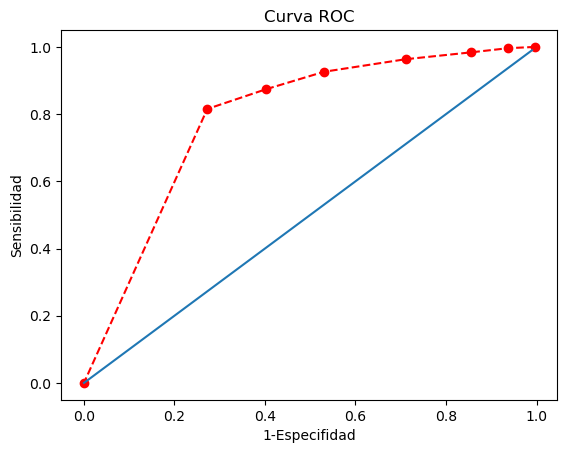

In [131]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
# Dibujar la Diagonal
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

La diagonal (benchmark) representa el 50%

La diagonal es una decision totalmente aleatoria

La diagonal es el peor modelo que existe

Cualquier curva que esté encima de la diagonal es un predictor mejor que una elección totalmente aleatoria (cara o cruz)

In [132]:
from sklearn import metrics
from pandas import Timestamp

In [133]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [134]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

In [135]:
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.000159
2,0.000000,0.470363
3,0.000455,0.470363
4,0.000455,0.474506


In [136]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_abline, xlim, ylim, xlab, ylab, geom_area, ggtitle

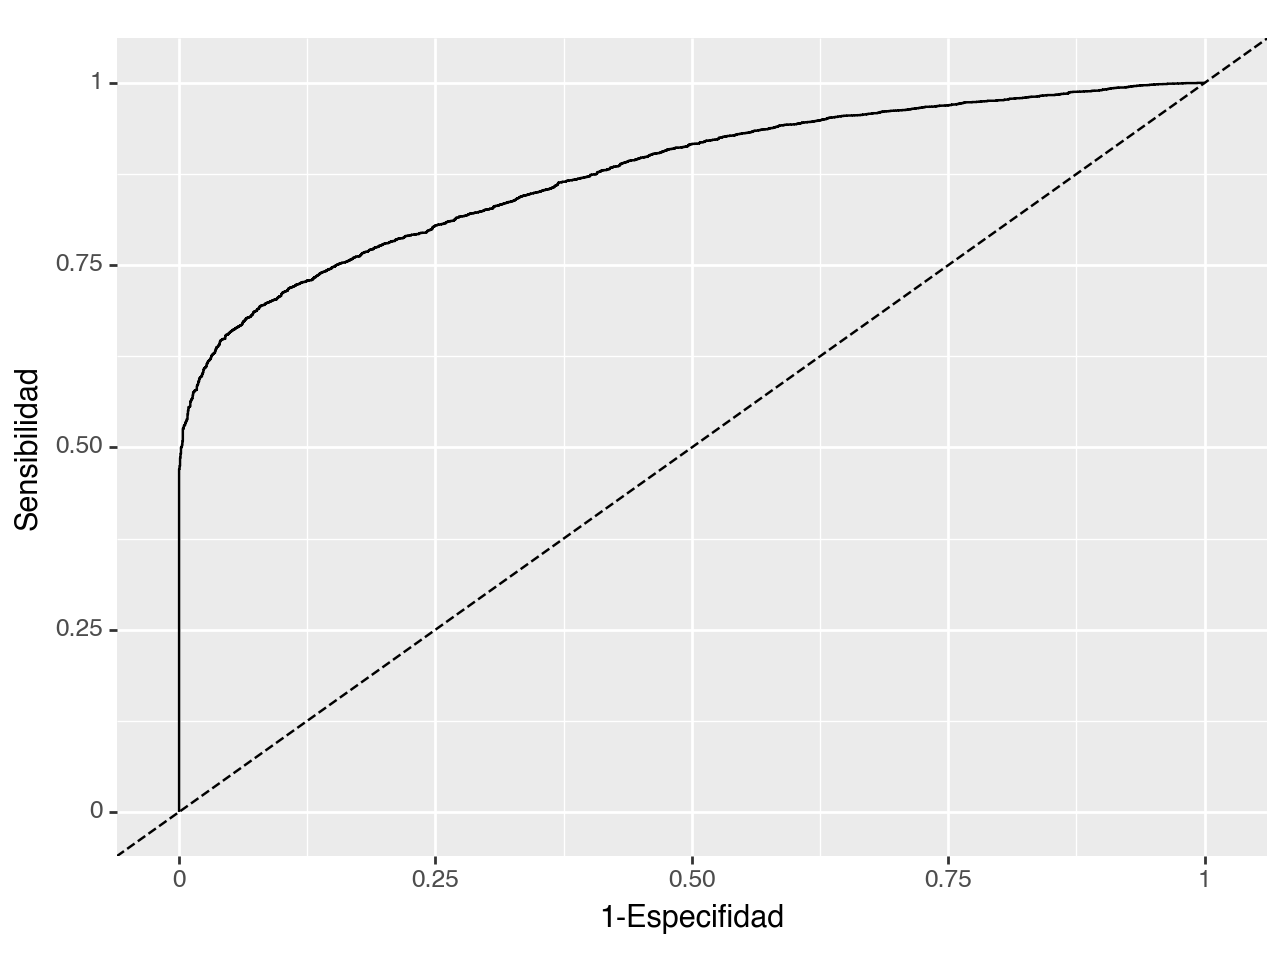

<Figure Size: (640 x 480)>

In [137]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

#### Compute Area Under the Curve (AUC)

In [138]:
auc = metrics.auc(espc_1, sensit)
auc

0.8770976251079403

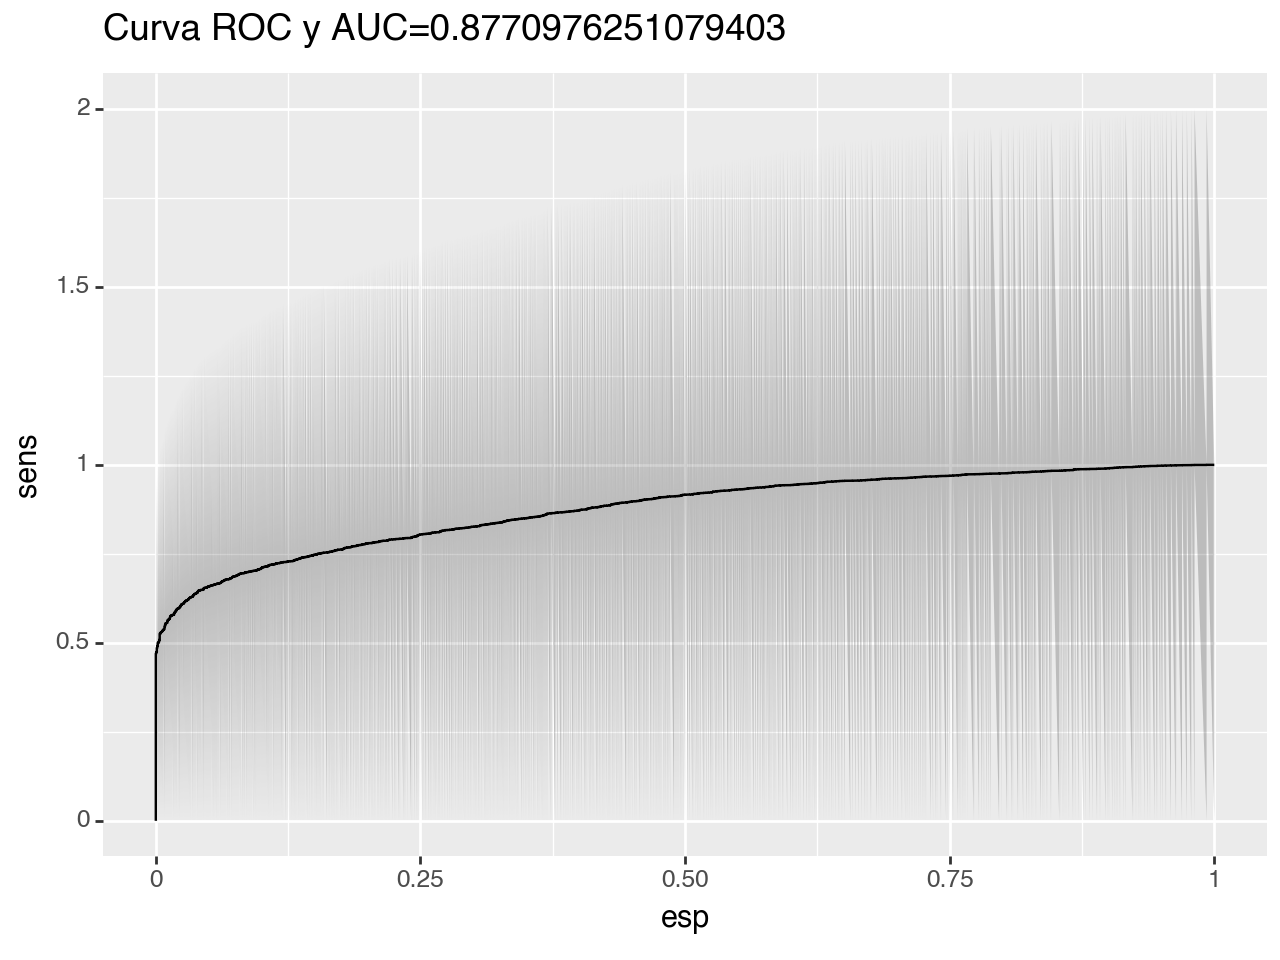

<Figure Size: (640 x 480)>

In [139]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))

## K Nearest Neighbors de Clasificación

Predicción: encontrar los k puntos más cercanos

Comparar cada uno de los grupos que existan en el conjunto de datos contra lo que quiera clasificar

Crear una lista con las distancias seguidas de la clase (cluster) para c/u de los puntos de la muestra

Luego ordenamos la lista por distancia más cercana y tomar los primeros k-valores de la lista para encontrar el más popular y obtener una clasificación.

In [140]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

from sklearn import preprocessing, neighbors

X = ['Age','Amount','AIE','Gen_Female','Status_Divorced','Status_Unknown', 'Color_Gold', 
'Color_White', 'Type_MasterCard', 'Type_Visa', 'Area_International']
Y = ['Outcome‘]

In [141]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [142]:
clf = neighbors.KNeighborsClassifier()

### Validación del Modelo KNN

In [143]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [144]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.8429313193297144

### Estimación del predictor

In [145]:
pred_knn = clf.predict(X_test)

### Matriz de confusión

In [146]:
confusion_matrix_knn = pd.crosstab(Y_test, pred_knn, rownames=["Actual"], colnames=["Predictions"])
confusion_matrix_knn

Predictions,0,1
Actual,,
0,1592,606
1,725,5551


Vemos que el porcentaje de eficacia es de 84,3% con validación cruzada. O sea, un poco mayor que con el Método de Regresión Logistíca, cuyos porcentaje promedio de eficacia con validación cruzada es de de 78,20 % y 80,76% sin validación cruzada.

Establecemos el modelo de clasificación. Podemos predecir si una tarjeta de crédito es fraudulenta con un 84,3 % de fiabilidad

## Arboles de Decisión

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

### Función de árboles de decisión

In [148]:
from sklearn.tree import DecisionTreeClassifier

Outcome: 1 = fraude, 0 = no fraude

Objetivo: establecer que una tarjeta de crédito -a posteriori- sea fraudelenta o no en función de las variables explicativas.

Algoritmo

1.	Calcular la entropía inicial en base a la variable objetivo

2.	Calcular la ganancia de información para cada variable del modelo para un nodo

3.	Seleccionar la variable que nos da la máxima ganancia de información como nodo de decision

4.	Repetir paso 2 y 3 para cada rama de cada nodo. El nuevo nodo identificado es un nodo hoja 

5.	Comprobar si el nodo hoja clasifica correctamente todos los datos. Entonces paramos en esa rama. Sino, volvemos al paso 2 …

El nodo hoja debe ser lo más homogéneo possible, pero evitando problemas de overfitting

Cuanto menor es la entropía, mejor queda clasificada la información

Número mínimo de elementos para hacer un split. Número mínimo de observaciones para que un nodo	se divida en un subnodo.

min_samples_split=20

Optional: min_samples_leaf: número mínimo de muestras que teien que haber para crear un nodo hoja

### Estimación del Modelo de Árboles de Decisión

In [149]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=5, random_state=99)

### Ajuste con validación del Modelo de Árboles de Decisión

In [150]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=99)

X = ['Age','Amount','AIE','Gen_Female','Status_Divorced','Status_Unknown', 'Color_Gold', 
'Color_White', 'Type_MasterCard', 'Type_Visa', 'Area_International']
Y = ['Outcome‘]

### Estimador del Predictor

In [151]:
pred_tree = tree.predict(X_test)

### Matriz de Confusión

In [152]:
confusion_matrix_tree = pd.crosstab(Y_test, pred_tree, rownames=["Actual"], colnames=["Predictions"])
confusion_matrix_tree

Predictions,0,1
Actual,,
0,1610,588
1,641,5635


Maximo arboles:

Create Decision Tree classifer object

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

Predict the response for test dataset

y_pred = clf.predict(X_test)

Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


### Visualización del árbol de decisión

In [153]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [154]:
import os
from graphviz import Source

In [155]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=5)
dtree = dtree.fit(X_train, Y_train)

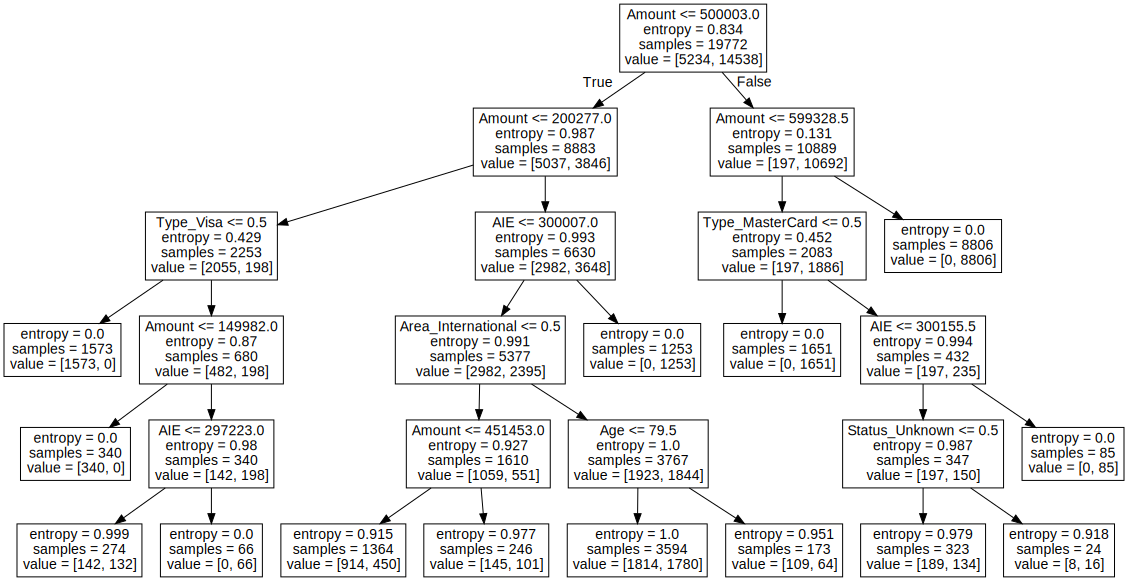

In [156]:
from IPython.display import SVG
graph =Source( tree.export_graphviz(dtree, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [157]:
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [158]:
#with open("../../TFM/Credit Card Fraud Detection Datasets/CCF_dtree.dot", "w") as dotfile:
#    export_graphviz(tree, out_file=dotfile, feature_names=test)
#    dotfile.close()

In [159]:
#dotfile = open("../../TFM/Credit Card Fraud Detection Datasets/CCF_dtree.dot", 'w')
#dotfile = tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
#dotfile.close()

In [160]:
#file = open("../../TFM/Credit Card Fraud Detection Datasets/CCF_dtree.dot", "r")
#text = file.read()
#text

### Validacion cruzada para la poda

Método: DecisionTreeClassifier

Profundida máxima (niveles)

Número mínimo de elementos para hacer un split. Número mínimo de observaciones para que un nodo	se divida en un subnodo.

min_samples_split=20

Optional: min_samples_leaf: número mínimo de muestras que teien que haber para crear un nodo hoja

In [161]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)

Ajustar el árbol

In [162]:
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [163]:
#from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import KFolds

In [164]:
from sklearn.model_selection import StratifiedKFold

In [165]:
import numpy as np
from sklearn.model_selection import KFold

Número de particiones: n_folds = 10

In [166]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)

10

In [167]:
#cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
#scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)
#scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
#scores_tree

In [170]:
X.columns

Index(['Age', 'Amount', 'AIE', 'Gen_Female', 'Status_Divorced',
       'Status_Unknown', 'Color_Gold', 'Color_White', 'Type_MasterCard',
       'Type_Visa', 'Area_International'],
      dtype='object')

In [171]:
range = (1,2,3,4,5,6,7,8,9,10)
for i in range:
#for i in range[1,10]:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
#   cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
    cv = skf = StratifiedKFold(n_splits=10)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.795263155255835
    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Score para i =  2  es de  0.8292498182456317
    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Score para i =  3  es de  0.8581034495725639
    [0.         0.79056061 0.1227921  0.         0.         0.
 0.         0.         0.05031789 0.03632939 0.        ]
Score para i =  4  es de  0.8630246308506105
    [0.         0.7853596  0.12586961 0.         0.         0.
 0.         0.         0.04839831 0.03494346 0.00542902]
Score para i =  5  es de  0.8630949760585626
    [0.00000000e+00 7.80893285e-01 1.30594352e-01 0.00000000e+00
 0.00000000e+00 3.52099102e-04 0.00000000e+00 0.00000000e+00
 4.80654514e-02 3.47031346e-02 5.39167814e-03]
Score para i =  6  es de  0.8620331545037478
    [8.19595067e-04 7.80275975e-01 1.30544070e-01 0.00000000e+00
 0.00000000e+00 3.51494438e-04 0.00000000e+00 0.00000000e+00
 4.79829081e-02 3.46435385e-02 5.38241895e-03]
Score para i =  7  es de  0.8619269472786983
    [1.12329076e-03 7.

Score para i =  

Con i = 4, si decidimos que el árbol solo crezca hasta 4 niveles de profundidad, nos va a dar la clasificación más óptima

Con i = 5, si decidimos que  el árbol solo crezca hasta 4 niveles de profundidad, nos va a dar la clasificación más óptima

## Bosques Aleatorios (Random Forest)

### Importar Biblioteca Random Forest para Clasificación

In [172]:
from sklearn.ensemble import RandomForestClassifier

### Generación del bosque aleatorio de clasificación

jobs = máquinas paralelas

oob_score (objects score): cálculo de los resultados de eficiencia

n_estimators: número de árboles

In [173]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

### Ajuste del bosque aleatorio

In [174]:
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

### Presentar los resultados

Matriz de decisiones: elección por mayoría

forest.oob_decision_function_

In [175]:
forest.oob_decision_function_

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       ...,
       [0.67647059, 0.32352941],
       [0.575     , 0.425     ],
       [1.        , 0.        ]])

Cada uno de ellos ha decidido con que probabilidad caemos dentro de cada categoría. 

Primer árbol fraude

Segundo árbol no fraude

60% probabilidad de fraude contra 40% de no fraude

80,5% probabilidad de fraude contra 19,4% de no fraude
47,2% probabilidad de fraude contra 52,7% de no fraude

un empate 0.5 0.5 no es bueno.

un NaN significa que las variables que ha tomado el árbol para decidir no habrá incluido niguna variable relevante para clasificar-. Ninguna que minimice la entropía y por tanto no habá hecho crecer el árbol

### Estimar los puntajes de eficiencia (scores)

forest.oob_score_

In [176]:
forest.oob_score_

0.8547404942292715

##### Con cierto número de árboles

In [177]:
range = [50, 100, 250, 500, 1000]
for i in range:
    forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=i)
    forest.fit(X,Y)
    #cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
    #cv = skf = StratifiedKFold(n_splits=10) 
    scores = cross_val_score(forest, X, Y, scoring="accuracy", cv = cv, n_jobs=2)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",forest.oob_score_)

Score para i =  50  es de  0.8568996465190905
    0.8538200099129081
Score para i =  100  es de  0.8565458898443181
    0.8552007363874531
Score para i =  250  es de  0.8576432475118454
    0.8578913828506691


/Users/jlazoros/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Score para i =  500  es de  0.8567935145027452
    0.8561212207038165


/Users/jlazoros/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Score para i =  1000  es de  0.8571829953119907
    0.855129929901579


n_estimators: número de árboles = 10, score = 0.856

n_estimators: número de árboles = 50, score = 0.857

n_estimators: número de árboles = 100, score = 0.856

n_estimators: número de árboles = 500, score = 0.857

n_estimators: número de árboles = 1000, score = 0.855

Podemos ver que con 100 árboles alcanzamos el máximo puntaje. Sin embargo la diferencia entre 10, 50, 100 árboles es pequeña

### Estimador de Predicción

In [178]:
pred_rf = forest.predict(X)

### Matriz de Confusión

In [179]:
confusion_matrix_rf = pd.crosstab(Y, pred_rf, rownames=["Actual"], colnames=["Predictions"])
confusion_matrix_rf

Predictions,0,1
Actual,,
0,7432,0
1,0,20814


### Random Forest Tree (Árbol de bosque aleatorio)

In [180]:
from sklearn.tree import export_graphviz
#from sklearn import tree
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
import pydotplus
import six

In [181]:
import os
from graphviz import Source

In [182]:
from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])#

In [183]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

In [184]:
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [185]:
forest.estimators_[5]

DecisionTreeClassifier(max_features='sqrt', random_state=1317087695)

In [186]:
forest.feature_names_in_

array(['Age', 'Amount', 'AIE', 'Gen_Female', 'Status_Divorced',
       'Status_Unknown', 'Color_Gold', 'Color_White', 'Type_MasterCard',
       'Type_Visa', 'Area_International'], dtype=object)

### Visualización del bosque aleatorio

In [187]:
from IPython.display import SVG

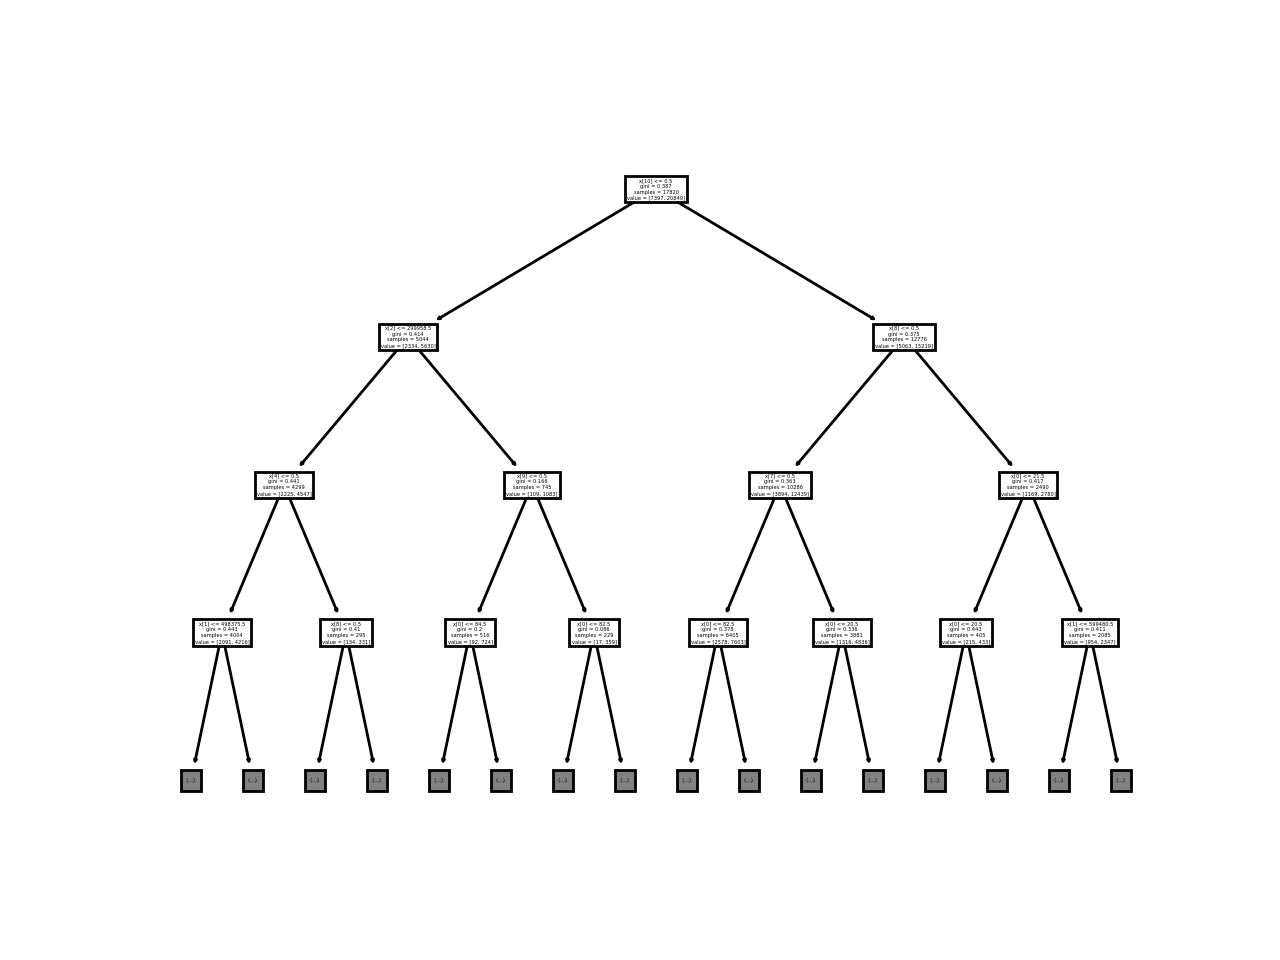

In [188]:
import matplotlib.pyplot as plt
from sklearn import tree
graph = tree.plot_tree(forest.estimators_[0], max_depth=3)
#plt.plot(graph)
#plt.savefig('test.svg')

In [189]:
#### Validación del Modelo de bosque aleatorio

In [195]:
forest_val = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

In [196]:
forest_val.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [197]:
forest_val.n_features_in_

11

In [201]:
forest_val.feature_names_in_

array(['Age', 'Amount', 'AIE', 'Gen_Female', 'Status_Divorced',
       'Status_Unknown', 'Color_Gold', 'Color_White', 'Type_MasterCard',
       'Type_Visa', 'Area_International'], dtype=object)

In [203]:
forest_val.oob_score_

0.8555027311349382

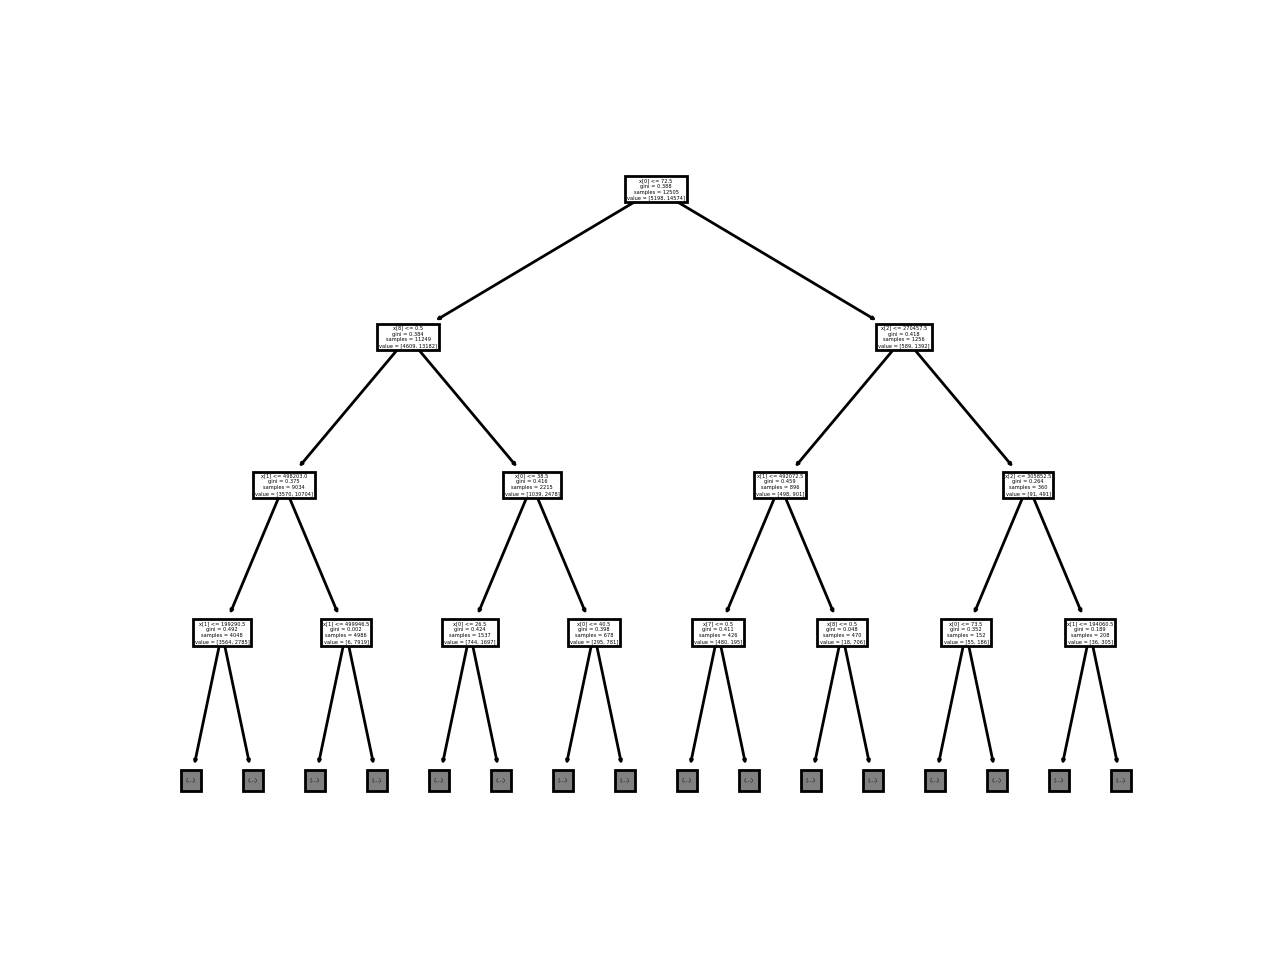

In [205]:
graph = tree.plot_tree(forest_val.estimators_[0], max_depth=3)

### Estimación de puntajes (scores) con cierto número de árboles

In [206]:
range = [50, 100, 250, 500, 1000]
for i in range:
    forest_tt = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=i)
    forest_tt.fit(X,Y)
    #cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
    #cv = skf = StratifiedKFold(n_splits=10) 
    scores = cross_val_score(forest, X, Y, scoring="accuracy", cv = cv, n_jobs=2)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",forest_tt.oob_score_)

Score para i =  50  es de  0.8561207475745192
    0.8555547688168236
Score para i =  100  es de  0.8566875203690241
    0.8558379947603201
Score para i =  250  es de  0.8553068264433804
    0.8569708985343057
Score para i =  500  es de  0.8574664067788114
    0.8568292855625576
Score para i =  1000  es de  0.8576431973727093
    0.8558733980032571


### Estimador de Predicción con validación

In [207]:
pred_rf_val = forest.predict(X_test)

### Matriz de confusión

In [208]:
confusion_matrix_rf_val = pd.crosstab(Y_test, pred_rf_val, rownames=["Actual"], colnames=["Predictions"])
confusion_matrix_rf_val

Predictions,0,1
Actual,,
0,2198,0
1,0,6276


## Resumen de Matrices de confusión

In [209]:
#df4 = df1.merge(df2, on='ORG_ID', how='left')
#df5 = df4.merge(df3, on='ORG_ID', how='left')
#df5

In [210]:
#inner join
#pd.merge(z,zz,on='ID')
#rownames=["Actual"], colnames=["Predictions"]
matrices = (confusion_matrix, confusion_matrix_knn, 
                       confusion_matrix_tree, confusion_matrix_rf_val)
suma_matriz = pd.concat(matrices)

In [211]:
suma_matriz

,0,1
0,1599,1159
1,599,5117
0,1592,606
1,725,5551
0,1610,588
1,641,5635
0,2198,0
1,0,6276
